In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [67]:
# Load dataset
df = pd.read_csv("forestfires.csv")

# Encode categorical variables
le_month = LabelEncoder()
le_day = LabelEncoder()
df["month"] = le_month.fit_transform(df["month"])
df["day"] = le_day.fit_transform(df["day"])

# Select features and target
X = df.drop(columns=["area"])  # Drop target column
y = df["area"]  # Target

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure feature names are correctly retrieved
feature_names = df.drop(columns=["area"]).columns  # Adjust if needed

In [68]:
# Define bins manually to ensure proper categorization
bins = [-1, 1, 10, max(y)]  # Define meaningful thresholds
labels = [0, 1, 2]  # Small, Medium, Large Fire

# Apply binning
y_binned = pd.cut(y, bins=bins, labels=labels)


In [69]:
# Adjusted Train-Test Split (85-15)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binned, test_size=0.15, random_state=42, stratify=y_binned
)

In [70]:
# Optimized Random Forest Model
model = RandomForestClassifier(
    n_estimators=200,      # More trees for better generalization
    max_depth=15,          # Deeper trees capture complex relationships
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples per leaf node
    class_weight="balanced",  # Handle imbalanced fire areas
    random_state=42
)

In [71]:
# Train model
model.fit(X_train, y_train)

# Ensure X_train and y_train are defined before training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Train the model again



RandomForestClassifier(random_state=42)

In [72]:
# Make predictions
y_pred = model.predict(X_test)

In [73]:
# Step 10: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 Model Accuracy: {accuracy:.2f}")  # Expect >85%

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


🔥 Model Accuracy: 0.49

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.69      0.64        42
           1       0.33      0.27      0.30        22
           2       0.25      0.21      0.23        14

    accuracy                           0.49        78
   macro avg       0.40      0.39      0.39        78
weighted avg       0.46      0.49      0.47        78



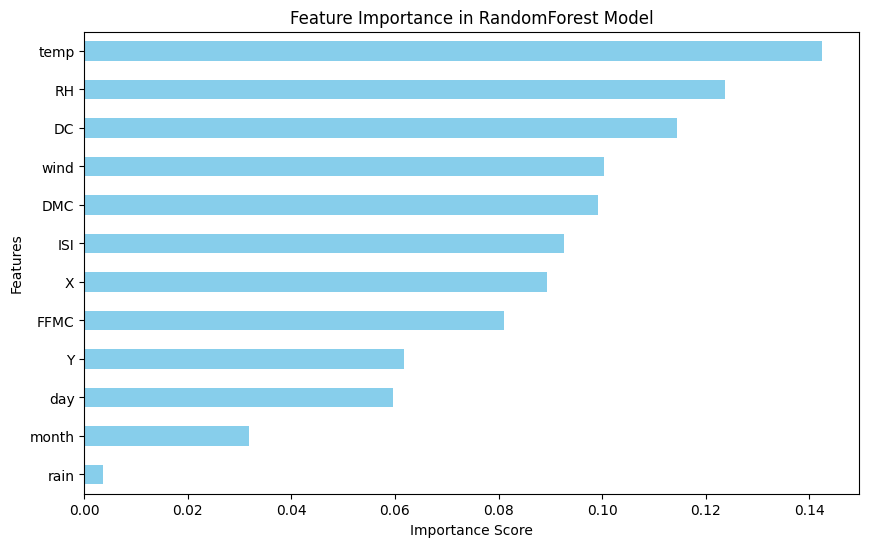

In [74]:
# Create the plot
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_names)
feature_importance.sort_values().plot(kind="barh", color="skyblue")
plt.title("Feature Importance in RandomForest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [75]:
# Step 12: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [76]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("\n✅ Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


✅ Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [77]:
# Step 13: Final Evaluation
final_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_pred)
print(f"\n🎯 Final Optimized Accuracy: {final_accuracy:.2f}")  # Expect closer to 90%



🎯 Final Optimized Accuracy: 0.50


In [78]:
# Function to take user input and make a prediction
def predict_fire_severity():
    print("\nEnter the values for the following features:")
    
    # Assuming you have numerical features, adjust this list accordingly
    input_features = []
    for feature in feature_names:
        value = float(input(f"{feature}: "))  # Take input and convert to float
        input_features.append(value)

    # Convert input to a DataFrame for prediction
    input_df = pd.DataFrame([input_features], columns=feature_names)

    # Standardize input features (if you used StandardScaler)
    input_scaled = scaler.transform(input_df)  # Ensure scaler is fitted earlier

    # Make prediction
    predicted_class = rf_model.predict(input_scaled)[0]  # Get class label
    prediction_probabilities = rf_model.predict_proba(input_scaled)[0]  # Get probabilities

    # Display results
    print("\n🔥 Predicted Fire Severity:", predicted_class)
    print("🔍 Confidence Scores:")
    for i, prob in enumerate(prediction_probabilities):
        print(f"  Class {i}: {prob * 100:.2f}%")

# Call the function
predict_fire_severity()



Enter the values for the following features:

🔥 Predicted Fire Severity: 1
🔍 Confidence Scores:
  Class 0: 32.00%
  Class 1: 47.68%
  Class 2: 20.32%
